<a href="https://colab.research.google.com/github/rushikeshtak17/Customer-Segmentation-Insights-from-KMeans-and-DBSCAN-Clustering/blob/main/Customer%20Segmentation-Insights%20from%20KMeans%20and%20DBSCAN%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Objective**


**To enhance data-driven decision-making for a retail marketplace, we will conduct exploratory data analysis to derive valuable business insights and utilize clustering algorithms, such as K-means and DBSCAN, for effective customer segmentation.**

\
**Furthermore, we will create targeted marketing strategies based on these customer segments to enhance engagement and boost sales.**

---











**Why is customer segmentation crucial for business?**
1.	**Personalized Marketing**: By segmenting customers, businesses can tailor their marketing efforts to specific groups, making campaigns more relevant and effective. This leads to higher engagement and conversion rates.
2.	**Improved Customer Retention**: Understanding different customer segments helps businesses address the unique needs and preferences of each group, enhancing customer satisfaction and loyalty.
3. **Product Development**: Insights from customer segments can guide the development of new products or services that better meet the needs of different groups.
5.	**Competitive Advantage**: Businesses that understand their customer segments can anticipate market trends and stay ahead of competitors by offering more targeted and innovative solutions.
6.	**Data-Driven Decision Making**: Segmentation provides a clearer picture of the customer base, enabling more informed and strategic business decisions.

**Overall, customer segmentation helps businesses understand their customers better, leading to more effective strategies and improved business outcomes.**

# **Strategy**

We have customer data from a retail marketplace. Our strategy includes:
1.	**Dataset Analysis:**
  *   Gather primary information, including feature details, data frame structure, and descriptive statistics.
  *   Identify and address any columns with null values.

2.	**Exploratory Data Analysis (EDA):**
  *   Perform univariate analysis.
  *   Perform bivariate analysis between various features in the dataset.

3.	**Customer Segmentation using Unsupervised Machine Learning Algorithms:**
  *   Apply K-means clustering.
  *   Apply DBSCAN clustering.



# **Comprehending dataset**

In [ ]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from itertools import combinations, product
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the CSV file.

df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Dataframe Structure
df.shape

(200, 5)

In [ ]:
#Verifying the presence of null values in any column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(['CustomerID'],axis=1, inplace =True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
#Descriptive Statistics
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000



**Observations:**

*   So far, we understand that there are 5 columns in dataset:
  1.  **CustomerID** : Unique ID assigned to the customer
  2. **Gender** : Gender of the customer
  3. **Age** : Age of the customer
  4. **Annual Income (k$)** : Annual Income of the customer
  5. **Spending Score (1-1000)** : Score assigned by the mall based on customer behavior and spending nature

*  There are 200 rows
*  No null values are present in any column.
*  We can drop the column "CustomerID" as it is not required for analysis.
*  The mean Age, mean Annual Income (k$) and mean Spending Score of customers are 38.85, 60.56, 50.20 respectively.



---



---







# **EDA**

## Univariate

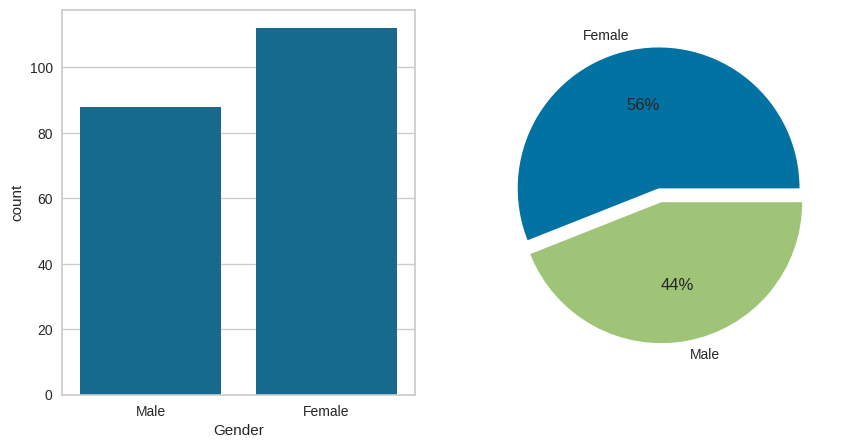

In [ ]:
#Univariate - Distribution of categorical variable

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df,x="Gender")
plt.subplot(1,2,2)
plt.pie(df["Gender"].value_counts(),labels=["Female","Male"],explode=[0.1, 0],autopct='%.0f%%')
plt.show()


**Observation**: Female customers slightly outnumber male customers, suggesting higher engagement or preference among women for the mall’s offerings.

In [ ]:
#creating list of Numerical features and categorical features
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features =  df.select_dtypes(exclude=["int64"]).columns.tolist()
numerical_features,categorical_features

(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], ['Gender'])

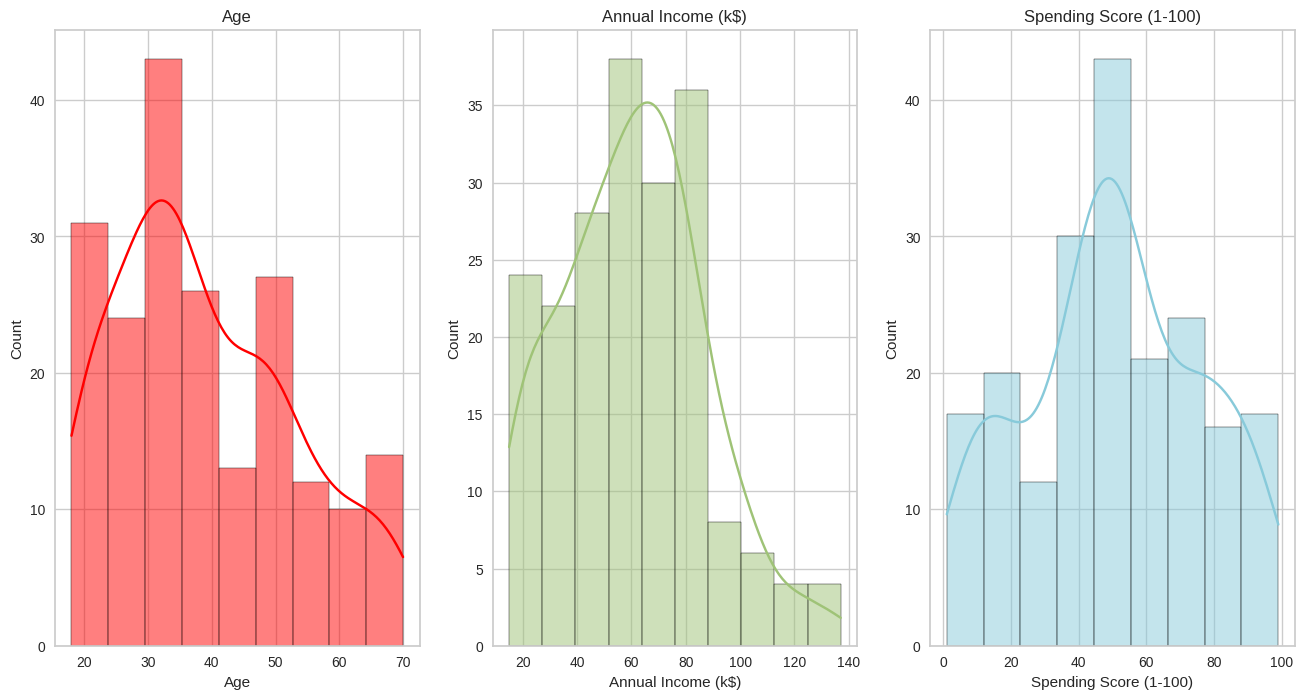

In [ ]:
#Univariate - Distrubution of Numerial variables using Histogram, KDE plot
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.histplot(df["Age"],kde=True,color ='red')
plt.title("Age")
plt.subplot(1,3,2)
sns.histplot(df["Annual Income (k$)"],kde=True, color ='g')
plt.title("Annual Income (k$)")
plt.subplot(1,3,3)
sns.histplot(df["Spending Score (1-100)"],kde=True, color ='c')
plt.title("Spending Score (1-100)")
plt.show()

In [ ]:
df_numerical =df.select_dtypes(exclude = ["object"])
df_numerical.skew()

,0
Age,0.485569
Annual Income (k$),0.321843
Spending Score (1-100),-0.047220


We examined the skewness of our features using the skew() function in pandas.

**Key Points**:
* Skewness between -0.5 and 0.5 indicates fairly symmetrical
data.
* Skewness between -1 and -0.5 or between 0.5 and 1 indicates moderately skewed data.
* Skewness less than -1 or greater than 1 indicates highly skewed data.

**Observation** - Distrubution of all features - Age, Annual Income (k$), Spending Score (1-100) seems fairly symmetrical.


---



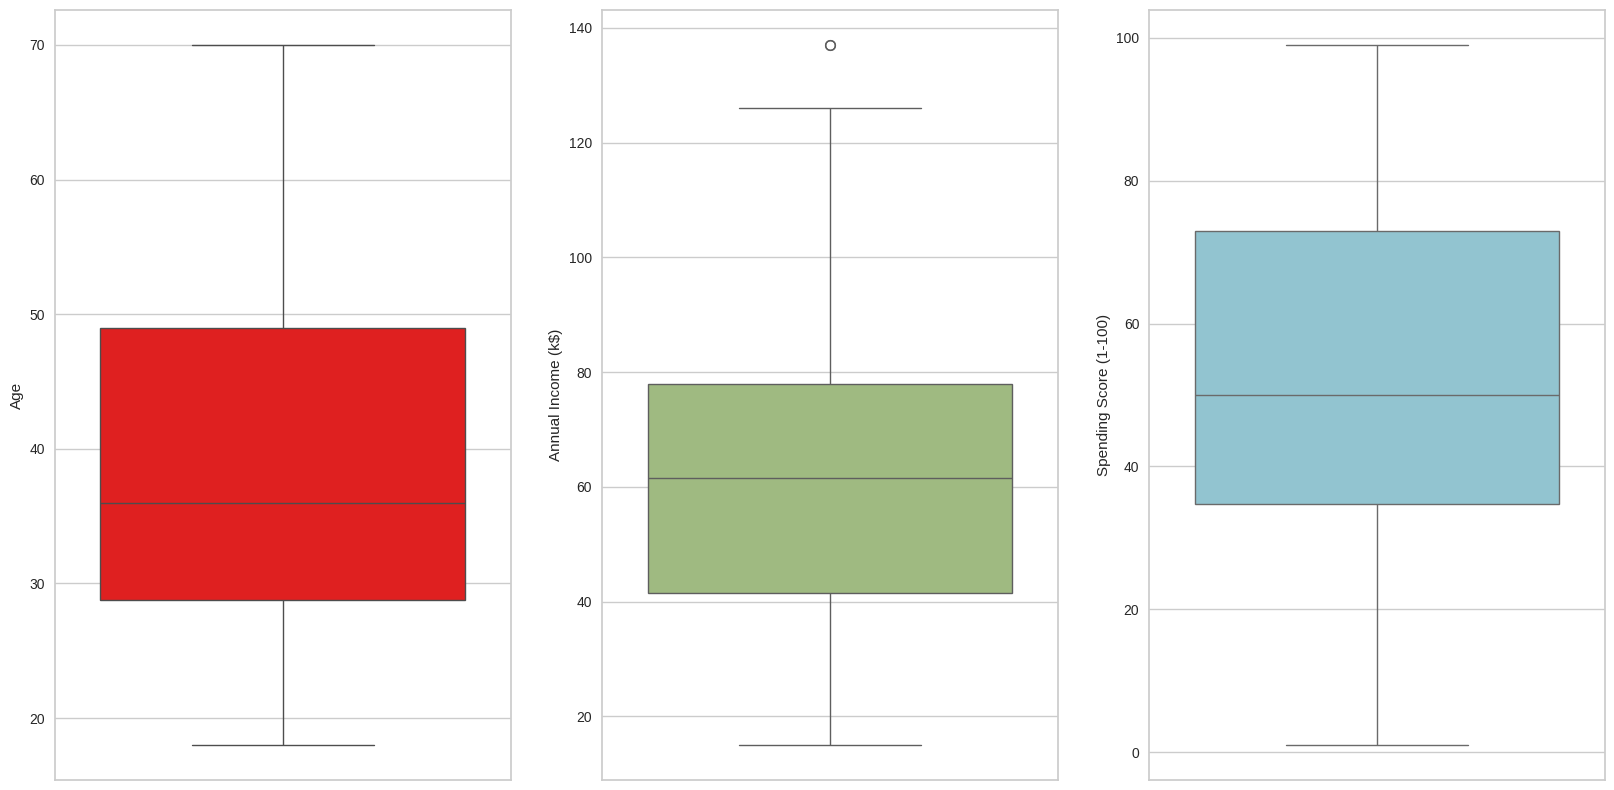

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(df["Age"],color ='red')
plt.subplot(1,3,2)
sns.boxplot(df["Annual Income (k$)"], color ='g')
plt.subplot(1,3,3)
sns.boxplot(df["Spending Score (1-100)"], color ='c')

plt.show()

**Observations**


1.   Majority of customers fall between the age of 28 to 58. Additionally, frequency  of young customers aged between  28 to 35 is very high.
2.   Annual Income of customers ranges between 41k  to  79k, with median around 60k$. There are also some outliers with exceptional salaries.
3.  Average spending score lies between 36 to 72 with median around 50



  ***We will understand further distribution  of Male and Female Customers in bivariate analysis.***



---

---






## **Bivariate**

### **Numerical vs Categorical**

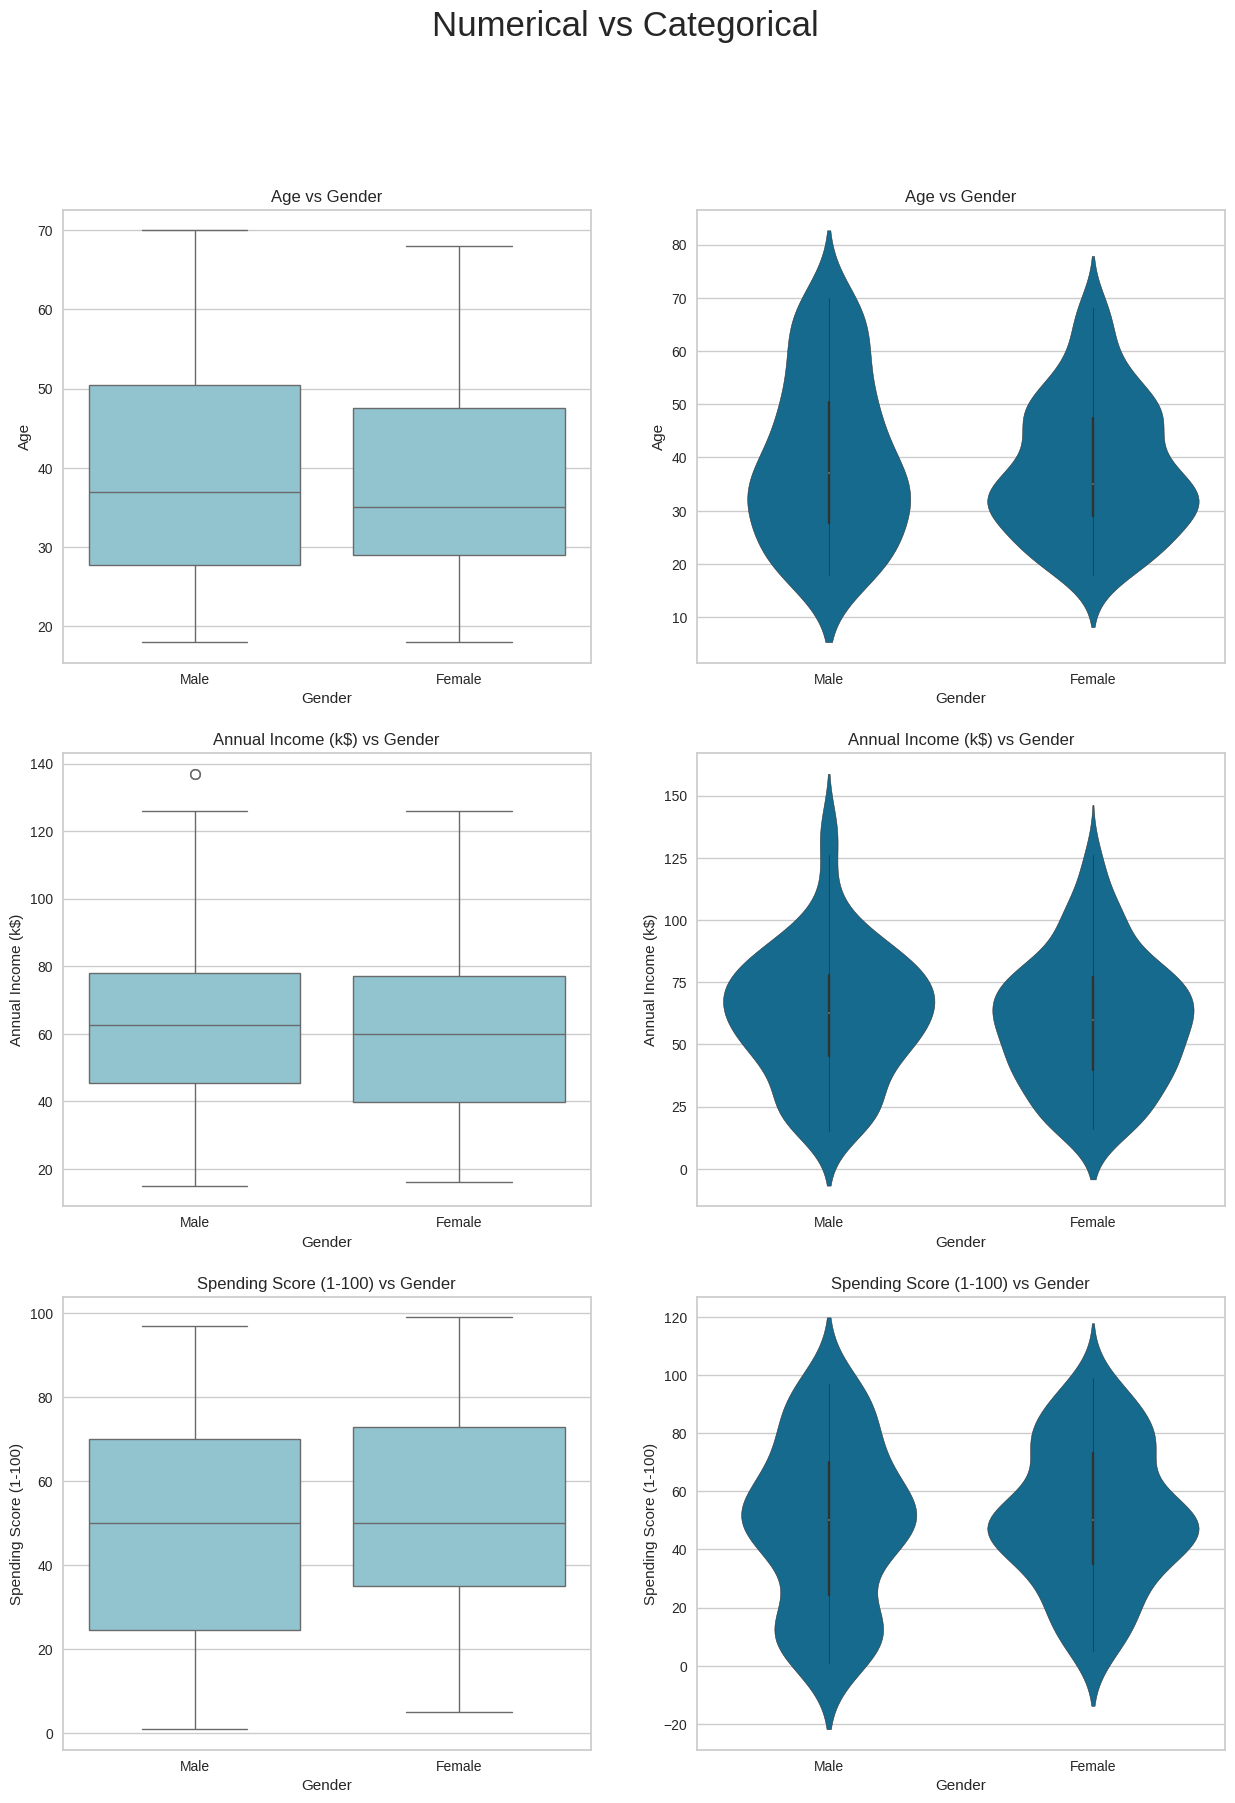

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,20))

for i,j in enumerate(numerical_features):
  sns.boxplot(x="Gender", y=j, data=df,ax=axes[i,0],color="c")
  title = j +" vs Gender"
  axes[i,0].set_title(title)

for i,j in enumerate(numerical_features):
  sns.violinplot(x="Gender", y=j, data=df,ax=axes[i,1])
  title = j +" vs Gender"
  axes[i,1].set_title(title)
fig.suptitle('Numerical vs Categorical', fontsize = 25)
plt.show()


**Observations**

**Age**


1. Female customers in our dataset generally range from 30 to just under 50 years old, while male customers span from just below 30 to 50 years old.
2. The median age for males is slightly higher than that of females.
3. Both genders exhibit a notable increase in numbers around the age range of 30 to 35.



**Annual Income (k$)**


1.   Female customers typically have annual earnings starting around 40k, while male customers generally start above this threshold.
2. The median annual income for both male and female groups is approximately 60k.
3. Notably, the income distribution for male customers declines sharply at the higher end, with some outliers, whereas the income spread for female customers is more balanced.

**Spending Score (1-100)** `

1. Although starting from different points—just below 40 for females and just above 20 for males—the median spending score for both groups is comparable.


---



### **Numerical vs Numerical**

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

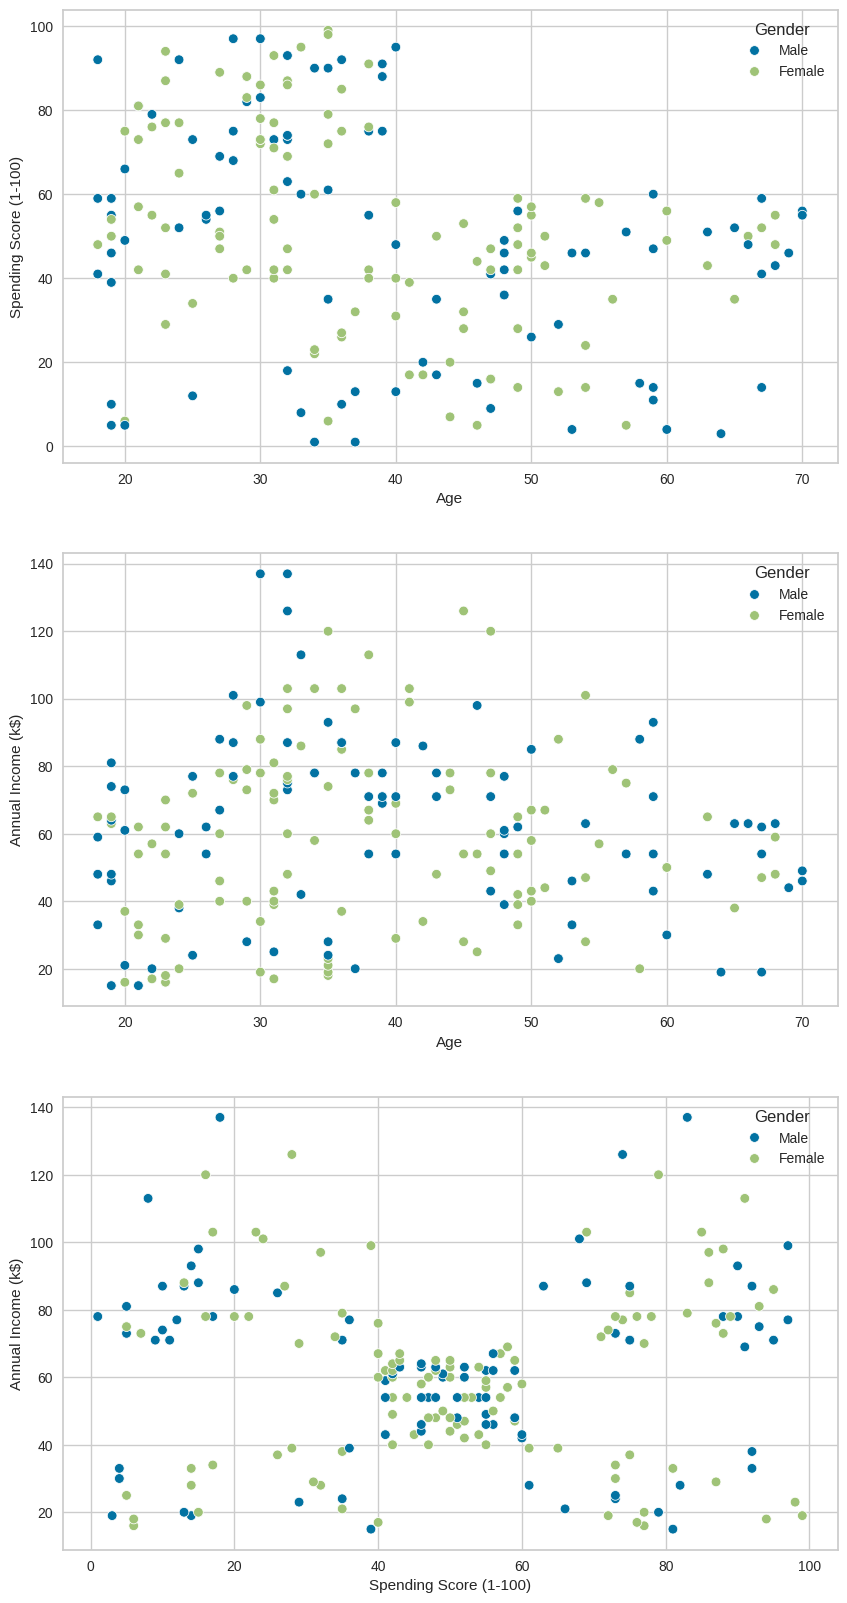

In [ ]:
# let's plot the scatterplots
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"],hue=df["Gender"])
plt.subplot(3,1,2)
sns.scatterplot(x=df["Age"],y=df["Annual Income (k$)"],hue=df["Gender"])
plt.subplot(3,1,3)
sns.scatterplot(x=df["Spending Score (1-100)"],y=df["Annual Income (k$)"],hue=df["Gender"])

**Observations**



1. Customers aged 20 to 40 exhibit notably high spending tendencies.
2. The “Annual Income (k$) vs Spending Score (1-100)” scatterplot reveals **five** distinct clusters. Data points within each cluster exhibit similar characteristics.

---



---



# **Clustering**

## **KMeans Clustering Algorithm**

**K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into ( k ) distinct clusters.** The goal is to group similar data points together (in this case the customers)  based on their features.




The K-value determines the number of clusters into which the data is partitioned. It's essential because it directly impacts the granularity of the clustering results: **a higher K-value leads to smaller, more detailed clusters, while a lower K-value results in larger, more generalized clusters.** Selecting the appropriate K-value is crucial for the algorithm's performance.

**We will use below methods to find the optimal value of K,**

1. **Elbow Method**
2. **Silhouette Method**







---


**Optimal Number of clusters:**






We will use **"KElbowVisualizer"** from the **Yellowbrick** library which will help us determine the optimal number of clusters within dataset. It implements the **“elbow method”** which involves fitting the model with a range of values for ( K ) (the number of clusters) and plotting a line chart of the model's performance metric (like distortion, silhouette score etc.) against ( K ).

The “elbow” point on the chart, where the curve bends and the rate of improvement slows, indicates the optimal number of clusters. This point is considered the best trade-off between model complexity and performance.


---



In [ ]:
df_numerical.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


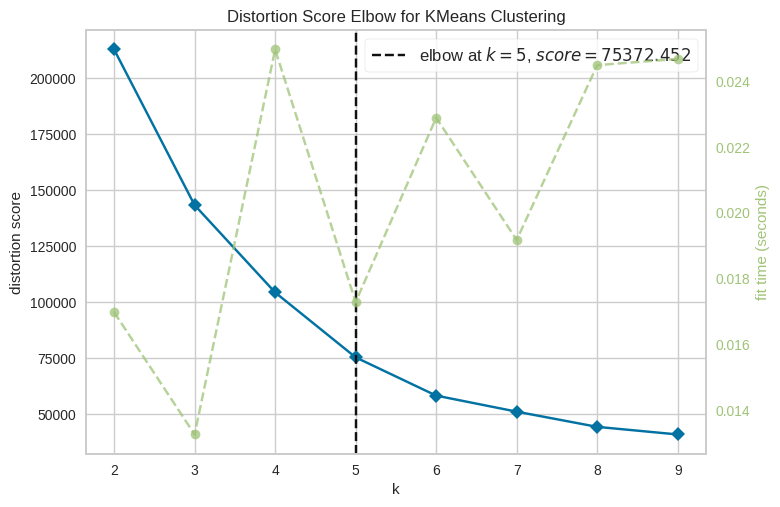

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_numerical)
visualizer.show()
plt.show()


**Observations:**
The graph illustrates the decrease in the distortion score as the number of clusters increases. However, a distinct “elbow” is not apparent. The algorithm indicates that 5 clusters might be optimal.
\
\
Another method to determine the optimal number of clusters is by plotting the silhouette score against the number of clusters. Let’s examine the results.


---



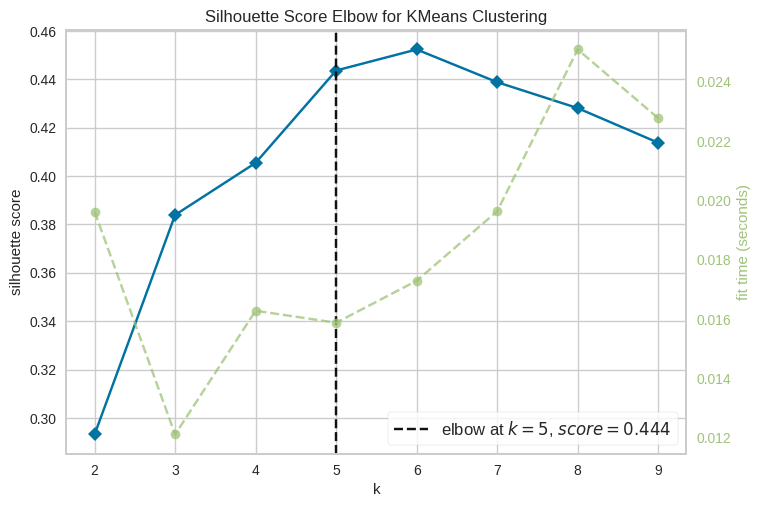

In [ ]:
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(df_numerical)
visualizer.show()
plt.show()

\
**Observations:**

**Both the distortion and silhouette score methods suggest that the optimal choices are 5 or 6 clusters.**
\
Now, let's create clusters using Kmeans algorithm.


---



In [ ]:
df_clusters = df_numerical.copy()   #Copying the dataset for Kmeans clustering



---



**How the K-means algorithm works?**





1.  **Initialization**: The algorithm randomly selects ( K ) initial centroids (cluster centers).
2. **Assignment**: Each data point is then assigned to the nearest centroid based on the Euclidean distance, forming ( K ) clusters.
3. **Update**: The new centroids are calculated by taking the mean of all data points assigned to each cluster.
4. **Repeat**: The assignment and update steps are repeated until the centroids no longer change significantly or a maximum number of iterations is reached.
5. **Convergence**: The algorithm converges when the centroids stabilize, indicating that the clusters are well-formed and the within-cluster variance is minimized.



---

In [ ]:
#Creating Clusters and adding "Labels" in dataframe
km_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(df_clusters[['Annual Income (k$)','Spending Score (1-100)']]) # initialise and fit K-Means model
df_clusters.loc[:,'KMeans5'] = km_5_clusters.labels_ # append labels to points

In [ ]:
df_clusters

,Age,Annual Income (k$),Spending Score (1-100),KMeans5
0,19,15,39,1
1,21,15,81,2
2,20,16,6,1
3,23,16,77,2
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,3
197,32,126,74,0
198,32,137,18,3


In [ ]:
#Co-ordinates of Centroids
km_5_clusters.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

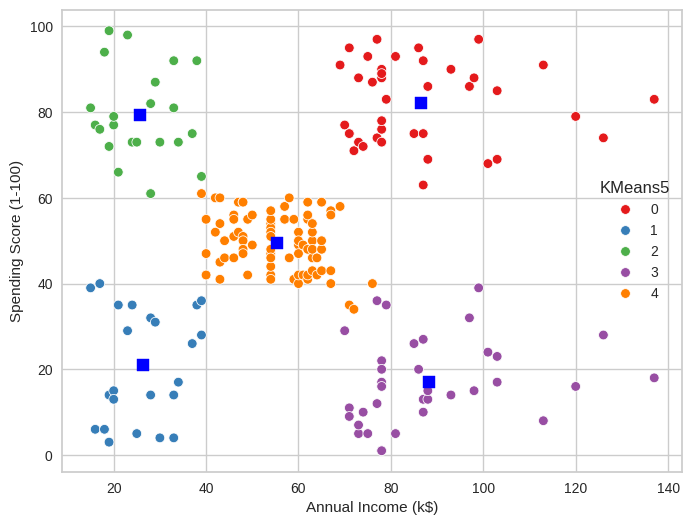

In [ ]:
#Creating a scatterplot with clustered data.

plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='KMeans5', data=df_clusters,palette='Set1' ,legend='full')
plt.scatter(km_5_clusters.cluster_centers_[:,0],km_5_clusters.cluster_centers_[:,1], marker='s', s=80, c="blue")
plt.show()

**Observations:**

The K-Means algorithm identified five distinct clusters:
1.	Customers with low annual income and high spending score.
2.	Customers with medium annual income and medium spending score.
3.	Customers with high annual income and low spending score.
4.	Customers with high annual income and high spending score.
5.	Customers with low annual income and low spending score.


---



## **3D View**

We will use the "**plotly.graph_objs**" module to plot the 3D scatter plot. This module provides a more flexible and detailed interface for creating various types of plots, including 3D scatter plots.


In [ ]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['KMeans5']==n]['Age'],
        y = db[db['KMeans5']==n]['Spending Score (1-100)'],
        z = db[db['KMeans5']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(df_clusters, 0, 'Cluster 0')
trace1 = tracer(df_clusters, 1, 'Cluster 1')
trace2 = tracer(df_clusters, 2, 'Cluster 2')
trace3 = tracer(df_clusters, 3, 'Cluster 3')
trace4 = tracer(df_clusters, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## **DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in machine learning to identify clusters in data based on density. Unlike K-means, which requires specifying the number of clusters in advance, DBSCAN can find clusters of arbitrary shape and is particularly effective at identifying outliers.

**How DBSCAN Works?**


Parameters:
1. **ε (epsilon)**: Defines the radius of the neighborhood around a point.
2. **MinPts**: The minimum number of points required to form a dense region (a cluster).
2. **Core Points**: A point is a core point if it has at least MinPts points within its ε-neighborhood.
3. **Directly Reachable**: A point ( q ) is directly reachable from a point ( p ) if ( q ) is within the ε-neighborhood of ( p ) and ( p ) is a core point.
4. **Density Reachable**: A point ( q ) is density reachable from ( p ) if there is a chain of points ( p_1, p_2, \ldots, p_n ) where ( p_1 = p ) and ( p_n = q ), and each point is directly reachable from the previous one.
5. **Clustering**:
  * Start with an arbitrary point.
  * If it is a core point, form a cluster.
  * Expand the cluster by including all points that are density reachable from the core point.
  * Repeat until all points are processed.
6. **Outliers**: Points that are not part of any cluster are considered outliers or noise.








To determine the optimal ε (epsilon) parameter, we will calculate the k-nearest neighbor (kNN) distances, which represent the average distance of each data point to its k-nearest neighbors. we will utilize the **sklearn.neighbors.NearestNeighbors** function to determine the k-nearest neighbors.

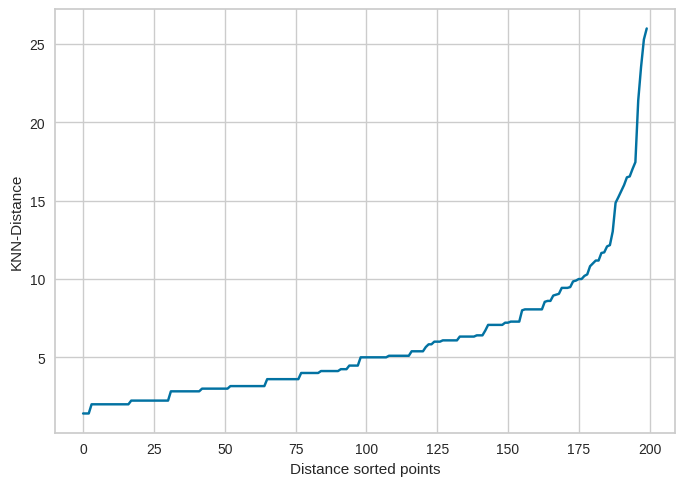

In [ ]:
k = 3  #initializing the value of k for kNN which can be same as MinPts
nbrs = NearestNeighbors(n_neighbors=k+1).fit(df_numerical[['Annual Income (k$)','Spending Score (1-100)']])
dist, ind = nbrs.kneighbors(df_numerical[['Annual Income (k$)','Spending Score (1-100)']])
k_dist = np.sort(dist[:, -1])

#Plot
plt.plot(k_dist)
plt.xlabel('Distance sorted points')
plt.ylabel(f'KNN-Distance')
plt.show()

**We can identify an “Elbow point” at a KNN distance of approximately 12.5, suggesting that 12.5 might be the optimal value for ε (epsilon)..**


**To ensure accuracy, let's also examine the silhouette scores. The silhouette score evaluates how similar an object is to its own cluster compared to other clusters.**

In [ ]:
#Let's find the best values of Epsilon and Minpoints by iterating.

eps_values = np.arange(8,13,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
params = list(product(eps_values, min_samples))
no_of_clusters, scores = [], []

for i, p in enumerate(params):
    cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_numerical)
    no_of_clusters.append(len(np.unique(cluster.labels_)))
    scores.append(silhouette_score(df_numerical, cluster.labels_))

print("Best Parameters", params[np.argmax(scores)])
print("No. of Clusters", no_of_clusters[np.argmax(scores)])

Best Parameters (12.5, 4)
No. of Clusters 6


Above, we are performing a grid search to find the best combination of eps and min_samples for the DBSCAN clustering algorithm by evaluating the silhouette score for each combination. The best parameters are those that yield the highest silhouette score, indicating the most well-defined clusters.


---



In [ ]:
#Creating clusters using DBSCAN algorithm and adding label to dataframe.

dbscan = DBSCAN(eps = 12.5, min_samples = 4).fit(df_numerical)
df_clusters.loc[:,'dbscan'] = dbscan.labels_ # append labels to points
print("Clusters: ", df_clusters.dbscan.unique())

Clusters:  [ 0 -1  1  2  3  4]


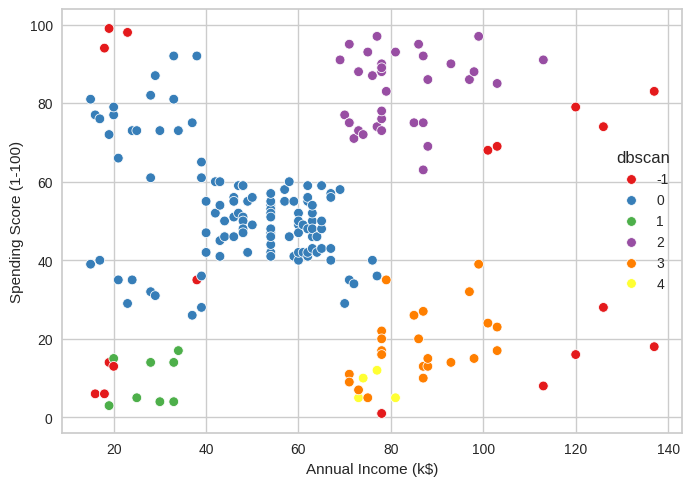

In [ ]:
#Creating a scatterplot with clustered data.
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=df_clusters,
                hue='dbscan', palette='Set1', legend='full')
plt.show()

**Observations**:

1. The DBSCAN algorithm identified five distinct clusters based on data density.
2. Red data points represent the outliers.


---



---



# **Conclusion**


## **The exploratory data analysis (EDA)**
  1.	**Gender Distribution:** Female customers slightly outnumber male customers, indicating a higher engagement or preference among women for the mall’s offerings.
  2.	**Age Distribution:** The majority of customers are aged between 28 and 58, with a notably high frequency of young customers aged 28 to 35.


**Marketing Suggestions:**


*   **Targeted Promotions for Women:**
  1. Develop marketing campaigns and promotions specifically tailored to female customers, such as exclusive discounts, loyalty programs, and events.
  2. Highlight products and services that are popular among women to attract and retain this demographic.


* **Engagement with Young Adults (28-35):**
  1. Create experiences and offers that appeal to young adults, such as trendy fashion collections, tech gadgets, and social events.
  2. Utilize social media platforms and influencers to reach this age group effectively.



---





## **Marketing suggestion for different Customer Segments**

* 	**Clients with Low Annual Income and High Spending Score:**
  1. Promotional Offers: Provide frequent discounts and special offers to encourage continued spending.
  2. Affordable Luxury: Highlight affordable luxury items that offer high perceived value without breaking the bank.

*	**Clients with Medium Annual Income and Medium Spending Score:**
  1. Value-Added Services: Offer value-added services such as free delivery, extended warranties, or personalized shopping experiences.
  2. Product Bundles: Introduce product bundles that provide more value for money, encouraging higher spending.

*	**Clients with High Annual Income and Low Spending Score:**
  1. Exclusive Experiences: Offer exclusive experiences such as VIP events, private shopping sessions, and early access to new collections.
  2. Premium Products: Highlight premium and high-end products that match their income level and lifestyle.

*	**Clients with High Annual Income and High Spending Score:**
  1. 	Luxury Offerings: Focus on luxury and high-end products that cater to their spending capacity.
  2. 	Exclusive Memberships: Introduce exclusive membership programs that offer unique benefits and privileges.
*	**Clients with Low Annual Income and Low Spending Score:**
  1. 	Budget-Friendly Options: Promote budget-friendly products and value deals to attract and retain these customers.
  2. 	Incentive Programs: Implement incentive programs that offer discounts or rewards for increased spending.

**By customizing marketing strategies to each customer segments, the mall can effectively meet the diverse needs and preferences of its customers, driving engagement and sales across all groups.**

---

---





